# Erlotinib PK Analysis

Reproduces the Erlotinib PK analyses reported in [[1](ref)] based on the data also reported [[1](ref)].

<a name="ref"> [1] </a> Eigenmann et. al., Combining Nonclinical Experiments with Translational PKPD Modeling to Differentiate Erlotinib and Gefitinib, Mol Cancer Ther (2016)

## The study overview:

LXFA 677 patient-derived tumours were implanted an mice and then treated with three different Erlotinib dosing startegies.

- Startegy one: daily oral dose of 100 mg/kg/day from day 3-8 and 14-16 (some adverse effects forced a drug holiday)
- Startegy two: daily oral dose of 25 mg/kg/day from day 3-16
- Startegy two: daily oral dose of 6.25 mg/kg/day from day 3-16

EDTA Plasma samples were taken

- Startegy one: on day 14
- Startegy two: on day 10 and 16
- Startegy two: on day 10 and 16

## 1. Reproduce PK Analysis

### 1.1 Explore data

Measurements were 

#### 1.1.2 Import data

In [1]:
import os
import pandas as pd

# Import data
path = os.getcwd()
data_raw = pd.read_csv(path + '/data/PK_LXF_erlo.csv', sep=';')

# Filter relevant information
data = data_raw[['#ID', 'TIME', 'Y', 'DOSE GROUP', 'DOSE', 'BW']]

# Convert TIME and Y to numeric values (currently strings)
data['TIME'] = pd.to_numeric(data['TIME'], errors='coerce')
data['Y'] = pd.to_numeric(data['Y'], errors='coerce')

# Sort TIME values (for plotting convenience)
data.sort_values(by='TIME', inplace=True)

# Filter NaNs
data = data[data['Y'].notnull()]

# Show data
data

,#ID,TIME,Y,DOSE GROUP,DOSE,BW
412,139,9.992361,0.952,6.25,.,22.8
141,52,9.995833,8.060,25.00,.,25.9
435,161,10.010417,551.000,6.25,.,23.9
187,108,10.010417,2380.000,25.00,.,25.1
118,34,10.018750,3500.000,25.00,.,27.9
391,131,10.019444,1290.000,6.25,.,23.3
368,119,10.043056,1050.000,6.25,.,21.1
164,91,10.043750,4340.000,25.00,.,26.5
233,129,10.103472,2270.000,25.00,.,27.5
302,31,10.103472,848.000,6.25,.,25.3


#### 1.1.2 Sort data into dosing groups

Each dose group has been dosed daily from day 2 to 16. PK samples have been taken on day 10 and 16.

In [2]:
# Get group identifiers
groups = data['DOSE GROUP'].unique()

# Sort into groups
data_one = data[data['DOSE GROUP'] == groups[0]]
data_two = data[data['DOSE GROUP'] == groups[1]]
data_three = data[data['DOSE GROUP'] == groups[2]]

# Show different dose groups
groups

array([  6.25,  25.  , 100.  ])

#### 1.1.3 Visualise dose group one

6.25


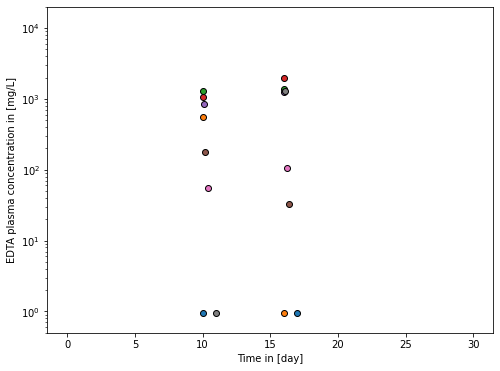

In [11]:
import matplotlib.pyplot as plt

# Display dose group
print(groups[0])

# Get unique animal IDs
ids = data_one['#ID'].unique()

# Plot measurements
fig = plt.figure(figsize=(8, 6))

for i in ids:
    # Mask for individual
    mask = data_one['#ID'] == i
    time = data_one[mask]['TIME']
    volume = data_one[mask]['Y']

    # Filter out Nan values
    mask = volume.notnull()
    time = time[mask]
    volume = volume[mask]

    # Create semi log plot
    plt.scatter(time, volume, edgecolor='black')

# Set x lim
plt.xlim([-1.5, 31.5])

# Set y lim (to match with other PK figures)
plt.ylim([5E-1, 2E4])

# Set y axis to logscale
plt.yscale('log')

# Label axes
plt.xlabel('Time in [day]')
plt.ylabel('EDTA plasma concentration in [mg/L]')

plt.show()

#### 1.1.4 Visualise dose group two

25.0


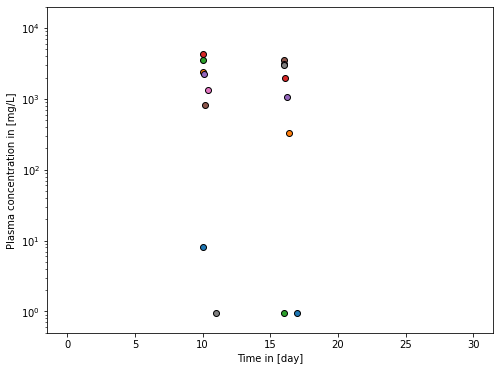

In [12]:
import matplotlib.pyplot as plt

# Display dose group
print(groups[1])

# Get unique animal IDs
ids = data_two['#ID'].unique()

# Plot measurements
fig = plt.figure(figsize=(8, 6))

for i in ids:
    # Mask for individual
    mask = data_two['#ID'] == i
    time = data_two[mask]['TIME']
    volume = data_two[mask]['Y']

    # Filter out Nan values
    mask = volume.notnull()
    time = time[mask]
    volume = volume[mask]

    # Create semi log plot
    plt.scatter(time, volume, edgecolor='black')

# Set x lim
plt.xlim([-1.5, 31.5])

# Set y lim (to match with other PK figures)
plt.ylim([5E-1, 2E4])
    
# Set y axis to logscale
plt.yscale('log')

# Label axes
plt.xlabel('Time in [day]')
plt.ylabel('Plasma concentration in [mg/L]')

plt.show()

#### 1.1.5 Visualise dose group two

100.0


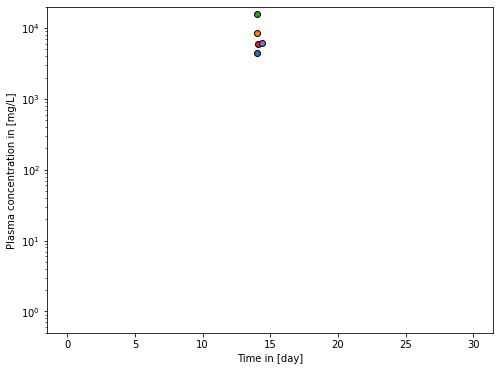

In [13]:
import matplotlib.pyplot as plt

# Display dose group
print(groups[2])

# Get unique animal IDs
ids = data_three['#ID'].unique()

# Plot measurements
fig = plt.figure(figsize=(8, 6))

for i in ids:
    # Mask for individual
    mask = data_three['#ID'] == i
    time = data_three[mask]['TIME']
    volume = data_three[mask]['Y']

    # Filter out Nan values
    mask = volume.notnull()
    time = time[mask]
    volume = volume[mask]

    # Create semi log plot
    plt.scatter(time, volume, edgecolor='black')

# Set x lim
plt.xlim([-1.5, 31.5])

# Set y lim (to match with other PK figures)
plt.ylim([5E-1, 2E4])
    
# Set y axis to logscale
plt.yscale('log')

# Label axes
plt.xlabel('Time in [day]')
plt.ylabel('Plasma concentration in [mg/L]')

plt.show()

### 1.2 Build Structural Model (pints.ForwardModel)

#### 1.2.1 Build Myokit Model

In [3]:
import myokit

from pkpd import model as m

# Build 1 compartmental PK model with default parameters
model = m.create_one_comp_pk_model()

# Validate model
model.validate()

# Check units
model.check_units(mode=myokit.UNIT_TOLERANT)

# Print model
print(model.code())

[[model]]
# Initial values
central.amount = 0

[central]
dot(amount) = -k_e * amount
    in [mg]
conc = amount / volume
    in [mg/L]
k_e = 0
    in [1/day]
time = 0 bind time
    in [day]
volume = 1
    in [L]




#### 1.2.2 Set oral administration 

In [ ]:
import myokit

class DosingRegimen(object):
    def __init__(self):
        self._amount = None
        self._duration = None
        self._periodicity = 0
        self._multiplier = 0
        self._dosing_regimen = None
        self._indirect_admin = False
        self._dosing_compartment = 'central'

    def __call__(self, model, amount, duration=None, periodicity=0, multiplier=0):
        """
        Returns the myokit.Model with appropriate structural adjustments for dosing,
        and a myokit.Protocol with the specified schedule.
        """
        if 

    
    def set_amdin(indirect=False):
        self.indirect_admin = indirect


def create_dosing_regimen(model, compartment, administration, amount, duration=None, periodicity=0, multiplier=0):
    """
    Returns a myokit.Protocol object with the specified dosing regimen, and alters the structural model, 
    by addition of bolus injection or dosing compartment.

    model -- myokit.Model
    compartment -- compartment with bolus injection or connection to dosing compartment
    administration -- type of administration: Injection into compartment or dosing compartment
    amount -- Applied dose
    duration -- How long did it take to apply the dose, if None duration is set to the smallest numerically stable duration,
                i.e. such that duration > 1e-6 and amount / duration < some upper value.
    periodicity -- In which intervals is dose applied. If 0 dose is applied once.
    multplier -- How often is dose applied? If 0, it's applied once for non-period and indefinitely for periodic schedules.
    """
    if not isinstance(model, myokit.Model):
        raise ValueError
    if not model.has_component(compartment):
        raise ValueError
    if administration != 'dosing compartment':
        raise NotImplementedError

    # Set dosing compartment
    dose_comp = model.get(compartment)
    if administration == 'dosing compartment':
        dose_comp = model.add_component('dose')
    
    # Add dose rate and regimen to dose compartment
    dose_rate = dose_comp.add_variable('dose_rate')
    regimen = dose_comp.add_variable('regimen')

    
    # define dosing regimen
    duration = 0.001  # [1 / d] how long does it take for dose to be in dosing compartment?
    dose_rate.set_rhs(25 * 0.2 / duration)  # 100 mg / kg / d let's estimate weight of mouse 0.2 kg
    dosing_regimen = myokit.Protocol()
    dosing_regimen.schedule(level=1, start=0, duration=duration)

#### 1.2.3 Build pints model

In [5]:
# Build pints model
pass

### 1.3 Build population model

This is the Hierarchical Log Prior of the model 

\begin{align}
\text{p}(\psi | \theta )\text{p}(\theta )
\end{align}

Should take a number of means and variances to construct $\text{p}(\theta )$ (Gaussian for means of $\text{p}(\psi | \theta )$ and half cauchy for variances of $\text{p}(\psi | \theta )$.

Think about whether this can be generalised for any structure.

Potentially best way: build a Hierarchical Log Posterior by combining a Likelihood and prior similar to PosteriorLogLikelihood, but appending the input params of the prior instead to the model params (this is the p(y|psi)p(psi|theta) bit). You have to provide posteriors for the population level paramers.

In that way a posterior can be constructed by passing any problem, any population distribution and any priors of the population distirbution parameters!

In [6]:
# Build hierarchical model 
pass

### 1.4 Build error model

This can be done by just using Loglikelihood from pints

In [7]:
pass

### Run inference

In [8]:
pass

### Visualise prediction